### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [1]:
from sklearn import datasets, metrics
digits = datasets.load_digits()

In [2]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
df = pd.DataFrame(digits.data, columns = digits.target_names)
df.info()

ValueError: Shape of passed values is (64, 1797), indices imply (10, 1797)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 42)
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [6]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9711111111111111


In [13]:
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(confmat, target_names=None, title=None):
    plt.matshow(confmat, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            plt.text(x=j, y=i, s=f'{confmat[i][j]}', va='center', ha='center')

    if target_names is not None:
        plt.xticks(np.arange(len(target_names)), target_names)
        plt.yticks(np.arange(len(target_names)), target_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.grid('off')
    plt.tight_layout()
    plt.savefig('fig.png', dpi=220, transparent=False, bbox_inches='tight')

Accuracy of test set = 0.971


C:\Users\weiti\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\weiti\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


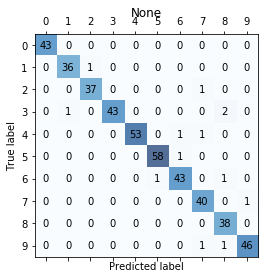

In [14]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy of test set = {metrics.accuracy_score(y_test, y_pred):.3f}")
plot_confusion_matrix(con_matrix, digits.target_names)